In [3]:
import numpy as np
import pandas as pd

# Customer Segmentation and Spending Prediction with EDA

In this notebook we'll explore the given data through plots and create a ML model to Group the customer based on their demographic and spending habits. Upon trying to build a model to predict their spending i faced probelms achiving the accuracy. Which'll talk about futher below this notebook.

I Would be glad if some peer review my ML model and give me some improving ideas as i'm begineer to Data scien

# Loading Libraries and Dataset

In [4]:
df = pd.read_csv("Customers.csv")

# Overviewing the Data

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [10]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

As we can see that we have 35 null values in the profession not marked in our data. I could delete them but already out dataset is very small. Also i can mark them other since all other fields seems to be filled. But later in my regression model since it is a catogorical column i'll anyway encode it with any onen of the encoder which will assign a number even to nulls since it will consider them as a set of category.

So, For now i'm gonna leave as it is.

# EDA through Plots

Below moving on to the actual segmentation of regression model it is good to understand more about out data. Thus i'm plotting some plots which will give more insights to our data.

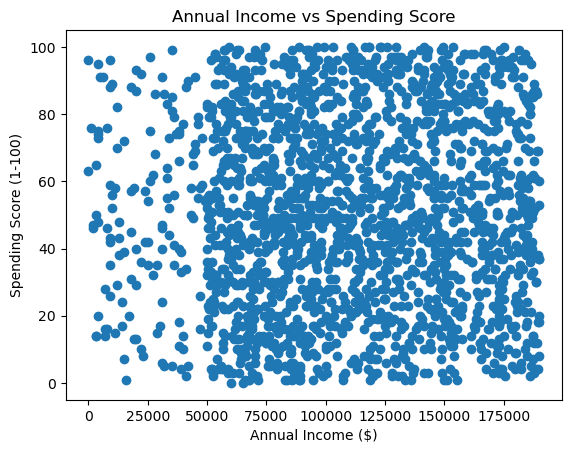

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

This shows that the spending score and annual income is all over the chart in which in turn signifies that our data might be very diversed. Actually this kind of data is very hard to segement cause one can find all kinds of patterns between millinore who spends nothing to a labour spending all of the income in a single day

i'll brief more of these in actual model building

One thing we can slightly infer is that most of the people after into the 50000-175000+ category as those where area that's too crowded

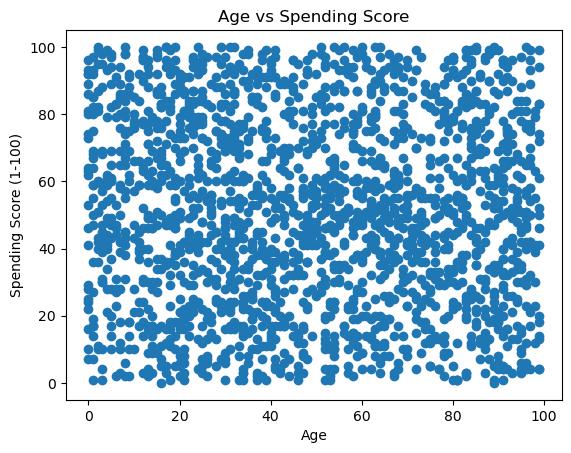

In [12]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Age vs Spending Score')
plt.show()


Here too the same story continues

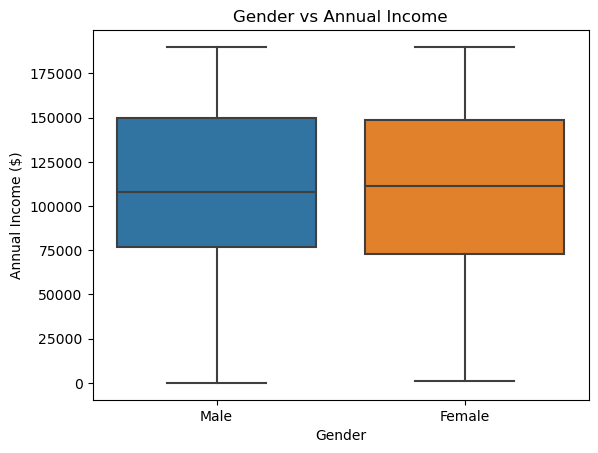

In [14]:
import seaborn as sns
sns.boxplot(data=df, x='Gender', y='Annual Income ($)')
plt.xlabel('Gender')
plt.ylabel('Annual Income ($)')
plt.title('Gender vs Annual Income')
plt.show()

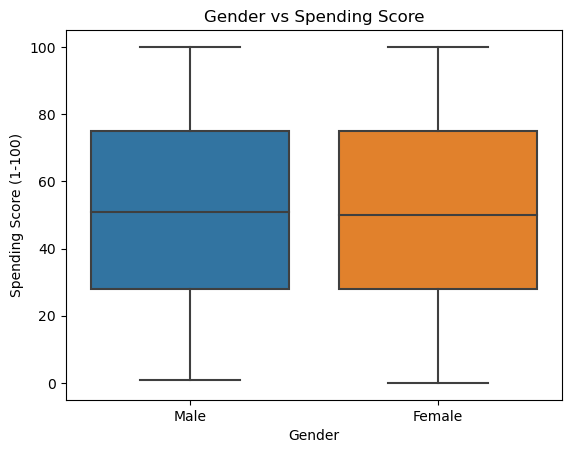

In [15]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender vs Spending Score')
plt.show()

These box plots shows that the annual income as well as well as spending score is almost equal between men and women. This futher makes the data more complicated : (

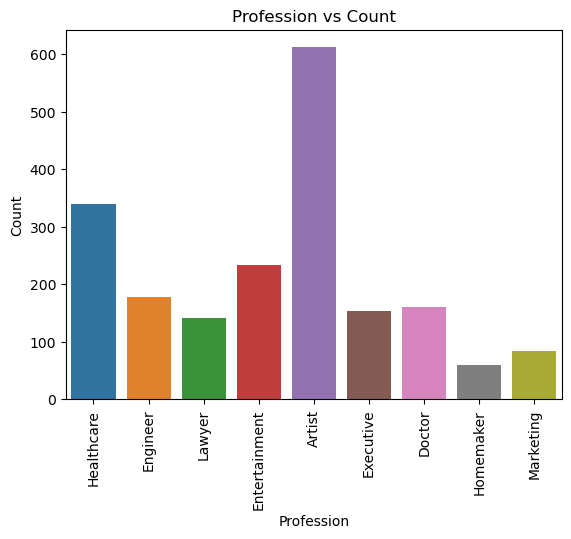

In [16]:
import seaborn as sns

sns.countplot(data=df, x='Profession')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession vs Count')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 0, 'Family Size')

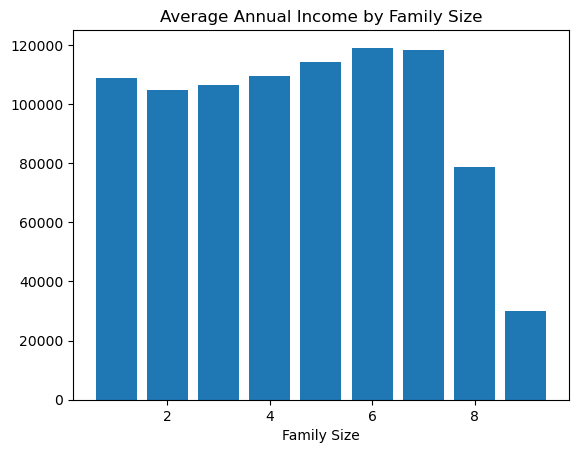

In [18]:
# Calculate average annual income by family size
family_income = df.groupby('Family Size')['Annual Income ($)'].mean().reset_index()

# Create column chart
plt.bar(family_income['Family Size'], family_income['Annual Income ($)'])
plt.title('Average Annual Income by Family Size')
plt.xlabel('Family Size')

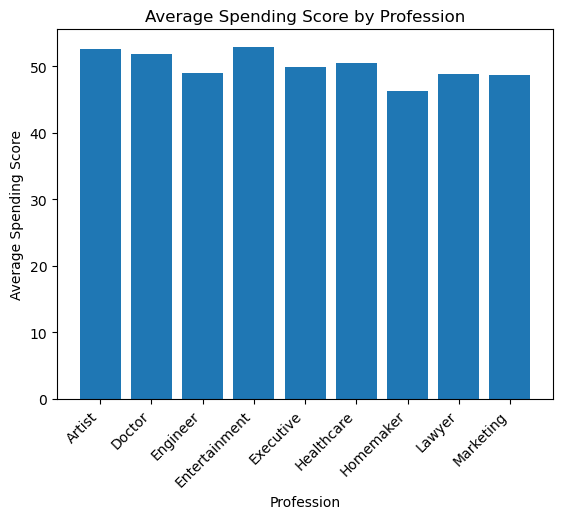

In [19]:
# Calculate average spending score by age group
age_groups = df.groupby('Profession')['Spending Score (1-100)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Profession'], age_groups['Spending Score (1-100)'])
plt.title('Average Spending Score by Profession')
plt.xlabel('Profession')
plt.ylabel('Average Spending Score')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

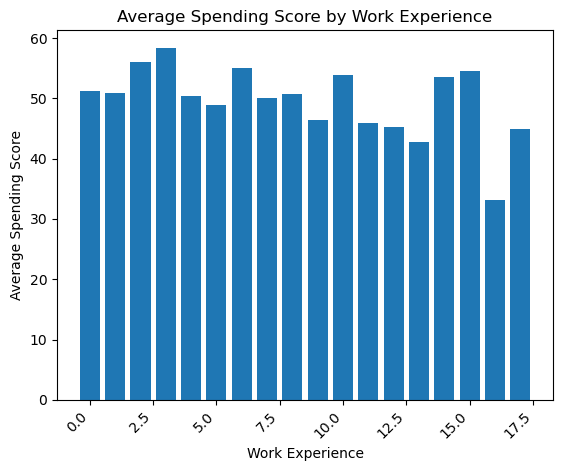

In [20]:
age_groups = df.groupby('Work Experience')['Spending Score (1-100)'].mean().reset_index()

# Create column chart
plt.bar(age_groups['Work Experience'], age_groups['Spending Score (1-100)'])
plt.title('Average Spending Score by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Average Spending Score')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

plt.show()

Finally, a Corr plot will give very good idea of how each variables relate to each others so, lets plot it

<AxesSubplot:>

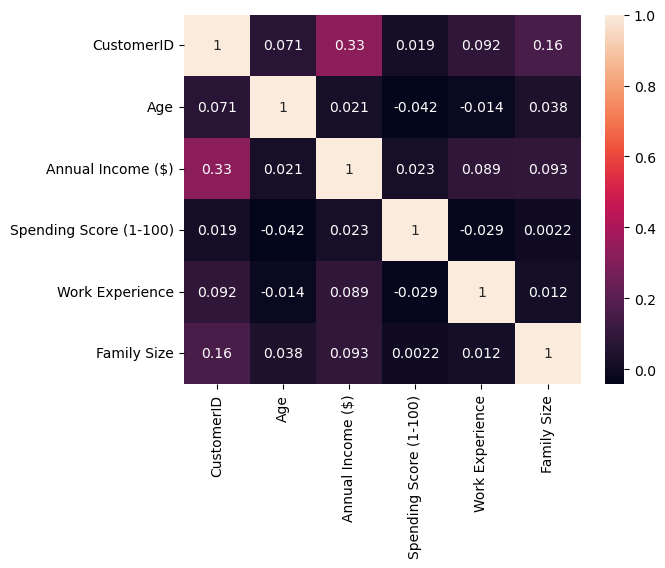

In [25]:
# Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)

As said the data and the variables pretty much have no significant postive or negative relation between each other. I guess this will severely affect the accuracy of the Ml Models.

Let's see how it goes

# Building ML Models

### Linear Regression

As said I used lable encoder to assign each category a number as a identifier to all the available category columns.

Next i used the changed numeric data to perfom a liner regression on it. Finnaly, I printed the MSE and R-squared values

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])

# Split data into training and test sets
X = df[['Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size', 'Gender']]
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the test set results
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R-squared: ', r2)


MSE:  757.6630224306293
R-squared:  0.006040337971136012


This is where i get into probs as my model has very low R-squared value. This us very bad since the data is simple with less variables but unfortunately very less accuracy. I belive the diveristy of the data is causing the inaccuracy. I might be wrong as well. So if other peer views my notebook pls let me know any other work arounds

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])

# Select the features and target variables
X = df[['Age', 'Annual Income ($)', 'Profession', 'Work Experience', 'Family Size', 'Gender']]
y = df['Spending Score (1-100)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R-squared:', r2)

MSE: 818.2149193333333
R-squared: -0.04106493524128463


I tried with Random Forest Regressor but still the same or even worse result :(

### Clustering Model

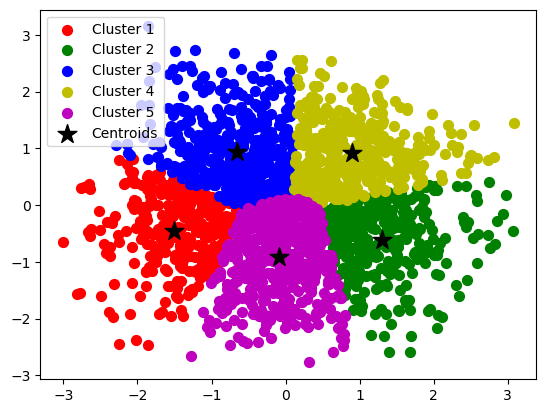

In [29]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare data
X = df[['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Profession', 'Work Experience', 'Family Size']]
X = pd.get_dummies(X) # One-hot encode categorical variables
X = StandardScaler().fit_transform(X) # Scale data

# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit KMeans clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.predict(X_pca)

# Visualize clusters
colors = ['r', 'g', 'b', 'y', 'm']
for i in range(len(colors)):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], s=50, c=colors[i], label='Cluster '+str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='*', c='black', label='Centroids')
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = df.drop(['Spending Score (1-100)'], axis=1)
y = df['Spending Score (1-100)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predict the test data
y_pred = rf.predict(X_test)

In [31]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 28.346510742064886


In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor object
rf = RandomForestRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', np.sqrt(-grid_search.best_score_))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 28.042199737586657


In [33]:
df['Income per Age'] = df['Annual Income ($)'] / df['Age']

### Ensemble methods: Tried using the XGBoost algorithm

In [37]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 2.4 MB/s eta 0:00:00


In [38]:
import xgboost as xgb

# Convert the data to DMatrix format required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_test, label=y_test)

# Define the hyperparameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Train the XGBoost model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=50,
    evals=[(dtrain, 'train'), (dval, 'val')],
    verbose_eval=10
)

[0]	train-rmse:53.34012	val-rmse:53.32201
[10]	train-rmse:30.95252	val-rmse:32.27947
[20]	train-rmse:26.06633	val-rmse:28.89016
[30]	train-rmse:24.42391	val-rmse:28.61550
[40]	train-rmse:23.40492	val-rmse:28.56836
[50]	train-rmse:22.50068	val-rmse:28.84654
[60]	train-rmse:21.52120	val-rmse:29.09416
[70]	train-rmse:20.78812	val-rmse:29.16661
[80]	train-rmse:20.12015	val-rmse:29.36248
[87]	train-rmse:19.63052	val-rmse:29.46329


In [39]:
# Make predictions on the validation set and calculate RMSE
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Validation RMSE:', rmse)

Validation RMSE: 29.455347079828897


### Ensemble methods: Tried using the XGBoost algorithm

In [40]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model with L2 regularization
rf = RandomForestRegressor(
    n_estimators=100, 
    max_depth=5, 
    min_samples_split=10,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.01,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.01, random_state=42)

In [41]:
# Predict the test data
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

RMSE: 27.838296751848667


I'll end here cause it will get more complicated if we tried other methods also i'm not well expertise of those too. Any help would be great to improve my models. Hope this notebook was informative, pls upvote if found insightful.

# The End